In [184]:
%%capture capt
%run 7_SVD.ipynb

In [185]:
def getHybrdRecommendations(userId):
    contentRecommended = getContentRecomMovies(userId, contentSimilarity)
    #sns.histplot(contentRecommended['score'])
    svdRatings = []
    indexMap = pd.Series(contentRecommended.index, index=contentRecommended['movieId'])
    for movie in contentRecommended['movieId']:
        prediction = svd.predict(randomUser, movie)
        svdRatings.append((prediction.est + contentRecommended.iloc[indexMap[movie]].score)*(5/6))
    hybridRecommended = contentRecommended
    hybridRecommended['score'] = svdRatings
    sns.histplot(hybridRecommended['score'])
    hybridRecommended = hybridRecommended.sort_values(['score'],ascending=False)
    return hybridRecommended[:11]

In [177]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("Total movies rated : ",len(ratedMovies))
print("Avg ratings :" , avgRating)
print("Top rated movies: ")
topRatedMovies['title'][:20]

userId :  23
Total movies rated :  437
Avg ratings : 3.5926773455377576
Top rated movies: 


38015                       The Hours
28197                          Amélie
64895                      Casablanca
52648      E.T. the Extra-Terrestrial
20395               Kill Bill: Vol. 1
31469                  Apocalypse Now
40119                          Gandhi
64145    Mr. Smith Goes to Washington
59119               Y Tu Mamá También
47413              Lawrence of Arabia
63977                    Run Lola Run
38129        The Shawshank Redemption
47475              The Princess Bride
59891             Requiem for a Dream
37741                      GoodFellas
60056                       Character
10609                  Ocean's Eleven
36056                       Dark City
61394                     City of God
65095                     Taxi Driver
Name: title, dtype: object

,movieId,score,titles
3,58559,4.520904,Hellboy II: The Golden Army
198,296,4.370708,DodgeBall: A True Underdog Story
65,2571,4.214949,Man of Steel
0,1200,4.137255,Alien: Resurrection
54,47,4.134084,I Heart Huckabees
27,3114,4.019662,Spider-Man 2
24,106920,4.010891,Collateral
2,33794,3.996644,Iron Man 2
29,1240,3.951166,"Definitely, Maybe"
138,4993,3.946213,Alvin and the Chipmunks: The Squeakquel


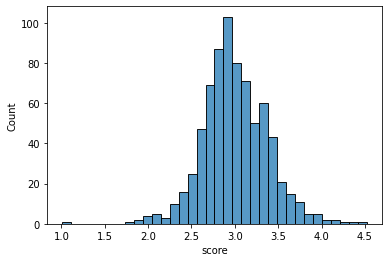

In [190]:
getHybrdRecommendations(randomUser)

,movieId,score,titles
23,3793,0.994320,Aliens
22,6333,0.994320,Shadow Conspiracy
120,7153,0.912415,Batman Begins
119,5952,0.912415,The Dark Knight
11,122892,0.818789,Cinderella
...,...,...,...
680,2460,0.100035,Dead Poets Society
698,6888,0.099357,I Origins
409,83134,0.099024,Another Earth
712,4014,0.092729,Freakonomics


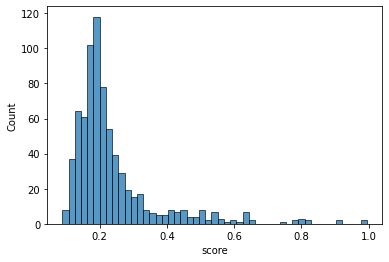

In [191]:
a = getContentRecomMovies(randomUser,contentSimilarity)
sns.histplot(a['score'])
a